### Step 1: Data Loading & Inspection

We begin by loading the tweet dataset and exploring its structure. This helps us understand what cleaning and preprocessing steps are required.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("tweets.csv", encoding='latin-1', header=None)

# Assign proper column names
df.columns = ['target', 'id', 'date', 'query', 'user', 'tweet']

# Preview the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1600000, 6)


,target,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Step 2: Data Cleaning

We clean the tweet text by removing unnecessary elements such as:
- Mentions (@username)
- URLs
- Hashtags (optional)
- Special characters
- Extra whitespace

This ensures cleaner input for downstream NLP tasks like tokenization and vectorization.

In [2]:
import re

# Function to clean raw tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\@\w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Keep only letters
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove extra spaces
    return tweet

# Apply cleaning
df['clean_tweet'] = df['tweet'].apply(clean_tweet)

# Preview cleaned tweets
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",A thats a bummer You shoulda got David Carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


### Step 3: NLP Preprocessing

We further process the cleaned tweet text by:
- Lowercasing
- Tokenizing words
- Removing stopwords (e.g., "the", "is", "and")
- Lemmatizing words (converting to root form)

This prepares our text for vectorization using TF-IDF or similar methods.

In [3]:
import nltk
import os

# Set up NLTK data path (if needed)
nltk_data_path = os.path.abspath('./nltk_data')
nltk.data.path.append(nltk_data_path)

# Download necessary resources
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)

[nltk_data] Downloading package punkt to e:\Study\internships\Coding
[nltk_data]     Samurai\CODING-SAMURAI-INTERNSHIP-
[nltk_data]     TASK\Level3\Project6_Sentiment_Tweets\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     e:\Study\internships\Coding Samurai\CODING-SAMURAI-
[nltk_data]     INTERNSHIP-
[nltk_data]     TASK\Level3\Project6_Sentiment_Tweets\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to e:\Study\internships\Coding
[nltk_data]     Samurai\CODING-SAMURAI-INTERNSHIP-
[nltk_data]     TASK\Level3\Project6_Sentiment_Tweets\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to e:\Study\internships\Coding
[nltk_data]     Samurai\CODING-SAMURAI-INTERNSHIP-
[nltk_data]     TASK\Level3\Project6_Sentiment_Tweets\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # lowercase + tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['preprocessed_tweet'] = df['clean_tweet'].apply(preprocess_text)

# Preview processed tweets
df[['clean_tweet', 'preprocessed_tweet']].head()

,clean_tweet,preprocessed_tweet
0,A thats a bummer You shoulda got David Carr of...,thats bummer shoulda got david carr third day
1,is upset that he cant update his Facebook by t...,upset cant update facebook texting might cry r...
2,I dived many times for the ball Managed to sav...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,no its not behaving at all im mad why am i her...,behaving im mad cant see


### Step 4: Text Vectorization and Train/Test Split

We use TF-IDF to convert preprocessed tweets into numerical vectors. This allows machine learning models to understand and classify the text data.

After vectorization, we split the dataset into training and testing sets for model evaluation.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the preprocessed tweet text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['preprocessed_tweet'])

# Target variable: 0 = negative, 4 = positive
y = df['target']

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("TF-IDF Matrix Shape:", X.shape)
print("Train Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

TF-IDF Matrix Shape: (1600000, 5000)
Train Set Size: (1280000, 5000)
Test Set Size: (320000, 5000)


### Step 5: Model Building — Logistic Regression

We use a Logistic Regression model to classify tweet sentiment into positive (4) or negative (0). Logistic Regression is a powerful linear model suitable for binary classification tasks like sentiment analysis.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 77.38 %
Confusion Matrix:
[[120000  39494]
 [ 32888 127618]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



### Step 6: Visualizations

To better understand the model performance and data distribution, we create:
- A heatmap of the Confusion Matrix
- A bar plot showing the sentiment class distribution
- Optional: Word clouds to visualize frequent words in positive vs negative tweets

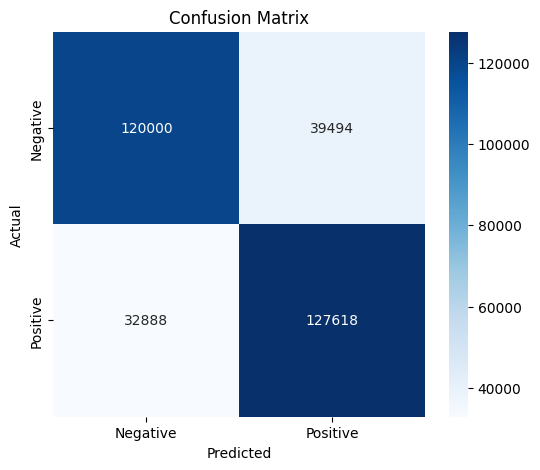

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import re

os.makedirs("images", exist_ok=True)
plot_title = "Confusion Matrix"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(plot_title)

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

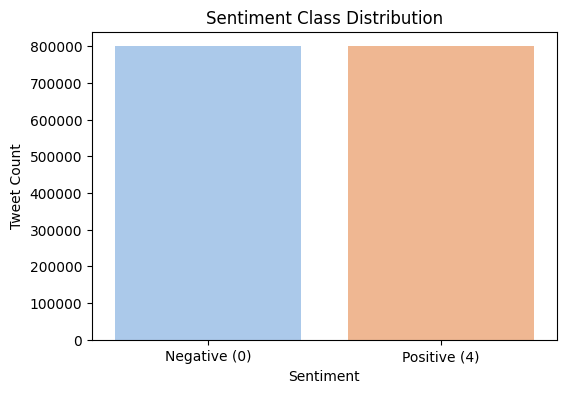

In [8]:
os.makedirs("images", exist_ok=True)
plot_title = "Sentiment Class Distribution"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', palette='pastel', legend=False)
plt.title(plot_title)
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks([0, 1], ['Negative (0)', 'Positive (4)'])

plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

### Step 7: Word Cloud Visualization

To gain insight into the most frequent words in positive and negative tweets, we generate word clouds.

- Positive tweets (label = 4)
- Negative tweets (label = 0)

This helps visually understand dominant themes in each sentiment.

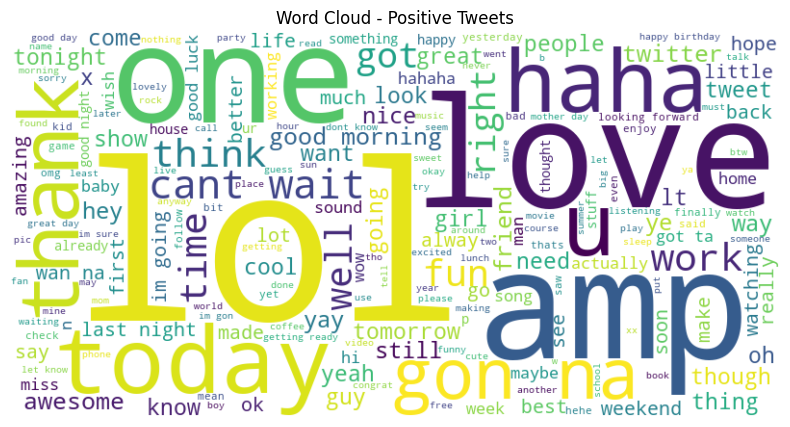

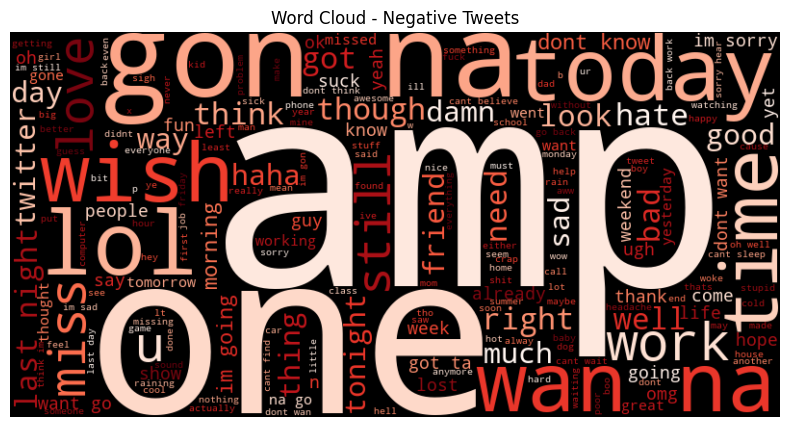

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)
plot_title = "Word Cloud - Positive Tweets"
plot_title2 = "Word Cloud - Negative Tweets"
filename = re.sub(r'[^A-Za-z0-9]+', '_', plot_title.lower()) + ".png"
filename2 = re.sub(r'[^A-Za-z0-9]+', '_', plot_title2.lower()) + ".png"

# Combine all words for each sentiment
positive_text = ' '.join(df[df['target'] == 4]['preprocessed_tweet'])
negative_text = ' '.join(df[df['target'] == 0]['preprocessed_tweet'])

# Positive word cloud
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title(plot_title)
plt.savefig(f"images/{filename}", dpi=300, bbox_inches='tight')
plt.show()

# Negative word cloud
plt.figure(figsize=(10, 5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title(plot_title2)
plt.savefig(f"images/{filename2}", dpi=300, bbox_inches='tight')
plt.show()